# Numpy, Pandas, Matplotlib, Seaborn

# Modules, packages and libraries

## Math module

In [1]:
# Without math:
pv = 100
f = 1.03
n = 2

fv = pv * f ** n
fv

106.08999999999999

In [2]:
# With math:
import math

fv = pv * math.pow(f, n)
fv

106.08999999999999

In [5]:
import math

math.sqrt(fv / pv) - 1

0.030000000000000027

In [4]:
# Or nicer (feels more functional):
from math import sqrt

sqrt(fv / pv) - 1

0.030000000000000027

## Numpy package

In [6]:
import numpy as np

np.sqrt(fv / pv)

1.03

In [7]:
pv * np.power(f, n)

106.08999999999999

# Numpy arrays (Numerical Python)

In [12]:
import numpy as np

cfs = [50, 100, 120, 150, 200, 300]
cfs

[50, 100, 120, 150, 200, 300]

In [15]:
type(cfs)

list

In [13]:
# Convert to numpy array
cfs_a = np.array(cfs)
cfs_a

array([ 50, 100, 120, 150, 200, 300])

In [14]:
type(cfs_a)

numpy.ndarray

In [16]:
# In-place changing of list elements is not nice and goes against FP.
# But with numpy arrays we can change and get a new copy at the same time i.e. not actually change the original.
cfs_a - 20

array([ 30,  80, 100, 130, 180, 280])

In [17]:
cfs

[50, 100, 120, 150, 200, 300]

In [18]:
cfs_a * 1.1

array([ 55., 110., 132., 165., 220., 330.])

In [20]:
cfs_a2 = np.array([10, 20, -10,30, 10, -5])

In [21]:
cfs_a + cfs_a2

array([ 60, 120, 110, 180, 210, 295])

In [22]:
# What are the types of the elements in our numpy array? Numpy arrays are homogeneous and only accept 1 data type i.e. no mixing.
cfs_a2.dtype

dtype('int64')

## Vectorized operations with Numpy

In [2]:
import numpy as np

cfs = np.array([50, 100, 120, 150, 200, 300])

In [3]:
cfs * 1.1 # Where we don't change the original array

array([ 55., 110., 132., 165., 220., 330.])

In [4]:
cfs + np.array([10, 20, 5, -10, 20, 10])

array([ 60, 120, 125, 140, 220, 310])

XYZ company evaluates to buy an additional machine that will increase future profits/cashflows by:
- &#36;20 in t1
- &#36;50 in t2
- &#36;70 in t3
- &#36;100 in t4
- &#36;50 in t5
The machine costs &#36;200.
Calculate the project's NPV evaluating whether to persue the project - XYZ's required rate of return (cost of capital) is 6% p.a

In [5]:
cfs = np.array([-200, 20, 50, 70, 100, 50])
r = 0.06
f = 1 + r

In [6]:
n = np.array([0, 1, 2, 3, 4, 5]) # Discounting periods

In [7]:
cfs / f ** n # This gives the present values of all the cash flows

array([-200.        ,   18.86792453,   44.499822  ,   58.77334981,
         79.20936632,   37.36290864])

In [9]:
npv = (cfs / f ** n).sum()
npv

38.71337130837991

## View vs copy - Pitfalls when slicing Numpy arrays

In [10]:
import numpy as np

cfs = np.array([100, 10, 20, 50, 30, 25])

In [11]:
last3 = cfs[-3 :] # Sneakily creates a view (and not a new copy)
last3

array([50, 30, 25])

In [12]:
last3[0] = 55

In [13]:
last3

array([55, 30, 25])

In [14]:
cfs # WHOOPS! We've accidentally changed it.

array([100,  10,  20,  55,  30,  25])

In [15]:
# use copy()
last3 = cfs[-3 :].copy()
last3

array([55, 30, 25])

In [16]:
last3[0] = 1000

In [17]:
last3

array([1000,   30,   25])

In [18]:
cfs

array([100,  10,  20,  55,  30,  25])

Some handy numpy methods for array:

In [3]:
import numpy as np

cfs = np.array([-200, 20, 50, 70, 100, 50])

In [4]:
# Cumulative sum (with this we will see the breakeven year, in this case year 4):
cumalative = cfs.cumsum()
cumalative

array([-200, -180, -130,  -60,   40,   90])

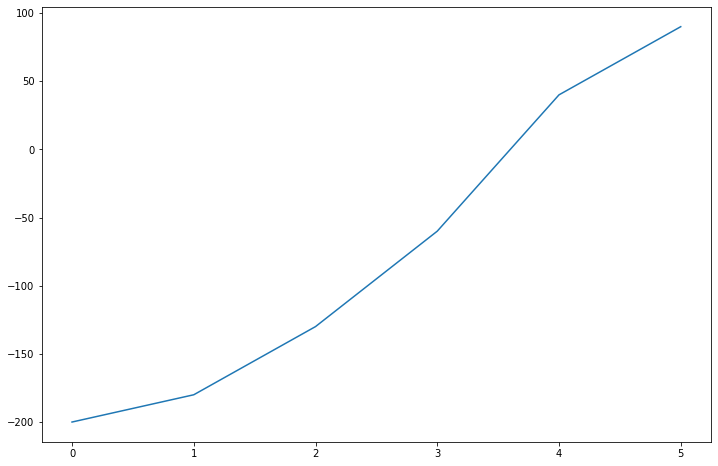

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
plt.plot(cumalative)
plt.show()

## Boolean arrays and conditional filtering

In [2]:
import numpy as np

In [3]:
cfs = np.array([-200, 20, 50, 70, 100, 50])
cfs

array([-200,   20,   50,   70,  100,   50])

In [4]:
cfs < 0

array([ True, False, False, False, False, False])

In [6]:
cfs[cfs < 0]

array([-200])

In [7]:
cfs[cfs > 0]

array([ 20,  50,  70, 100,  50])

## Advanced filtering and bitwise operators

In [8]:
import numpy as np

In [9]:
cfs = np.array([-200, 20, 50, 70, 100, 50])

In [10]:
mask1 = cfs < 0
mask1

array([ True, False, False, False, False, False])

In [11]:
mask2 = np.abs(cfs) > 60
mask2

array([ True, False, False,  True,  True, False])

In [12]:
mask1 | mask2

array([ True, False, False,  True,  True, False])

In [13]:
cfs[mask1 | mask2]

array([-200,   70,  100])

In [14]:
~(mask1 | mask2)

array([False,  True,  True, False, False,  True])

In [15]:
cfs[~(mask1 | mask2)]

array([20, 50, 50])

In [16]:
mask3 = cfs >= 0
mask4 = cfs < 30

In [17]:
cfs[mask3 & mask4]

array([20])

## Determining a project's payback period with np.where()

The XYZ company evaluates to buy additional machine that will increase profits/cashflows by:
- &#36;20 in t1
- &#36;50 in t2
- &#36;70 in t3
- &#36;100 in t4
- &#36;50 in t5

The machine costs &#36;200 (investment) - Calculate the `payback period` (time until initial investment is recovered).

In [19]:
import numpy as np

In [20]:
cfs = np.array([-200, 20, 50, 70, 100, 50])
cfs

array([-200,   20,   50,   70,  100,   50])

In [21]:
cfs.cumsum()

array([-200, -180, -130,  -60,   40,   90])

In [22]:
cfs.cumsum() > 0

array([False, False, False, False,  True,  True])

In [23]:
np.where(cfs.cumsum() > 0)

(array([4, 5]),)

In [26]:
np.concatenate(np.where(cfs.cumsum() > 0))

array([4, 5])

In [29]:
paybackPeriod, *rest = np.concatenate(np.where(cfs.cumsum() > 0))
paybackPeriod

4

In [30]:
# Or
np.nonzero(cfs.cumsum() > 0)[0][0]

4

In [28]:
# Another flatten
import more_itertools

list(more_itertools.flatten(np.where(cfs.cumsum() > 0)))

[4, 5]

## Creating Numpy arrays from scratch

In [31]:
import numpy as np

In [32]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [34]:
np.arange(5, 11, 0.5)

array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ,
       10.5])

In [35]:
# 10 evenly spaced (interest rate) numbers:
np.linspace(0.01, 0.15, num = 10)

array([0.01      , 0.02555556, 0.04111111, 0.05666667, 0.07222222,
       0.08777778, 0.10333333, 0.11888889, 0.13444444, 0.15      ])

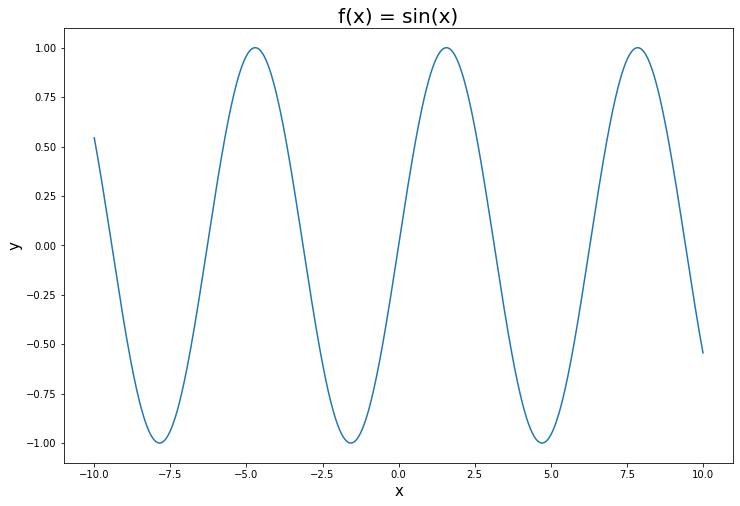

In [36]:
x = np.linspace(-10, 10, 1000)
y = np.sin(x)

import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
plt.plot(x, y)
plt.title("f(x) = sin(x)", fontsize = 20)
plt.xlabel("x", fontsize = 15)
plt.ylabel("y", fontsize = 15)
plt.show()

In [37]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [38]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])